<a href="https://colab.research.google.com/github/zzhining/python_ml_dl2/blob/main/answer/6_1_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사이킷런의 내장 데이터 셋 중 하나인 [유방암 데이터 셋(breast_cancer)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
)을 사용하여 양성 여부(양성: 0/ 음성:1)를 예측하는 모델을 생성한다. 또한 양성 여부를 판단하는 데 있어서 가장 중요한 특징이 무엇인지도 확인해보자.
* 코드 작성 시, 랜덤 씨드를 작성해야 하는 경우, 모두 42로 설정한다.
* 특별한 조건이 없다면, 매개변수는 디폴트 값을 사용한다.


# 문제1
데이터 셋을 불러오고, 아래 항목을 확인하시오.
-	데이터의 행과 열의 구조(shape)
-	`label`의 유형과 각 유형별 데이터의 개수
-	결측치, 중복값 존재 여부


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['label'] = breast_cancer.target

In [2]:
#데이터의 행과 열의 구조
df.shape

(569, 31)

In [3]:
#‘label의 유형과 각 유형별 데이터의 개수
df['label'].value_counts()

,count
label,
1,357
0,212


In [4]:
# 결측치 확인
null_count = df.isnull().sum().sum()
# 중복값 확인
duplicated_count = df.duplicated().sum()

print('결측치 개수:{}, 중복값 개수:{}'.format(null_count,duplicated_count))

결측치 개수:0, 중복값 개수:0


# 문제2
‘label’ 열을 제외한 나머지 컬럼을 독립변수(X)로 지정하고 ‘label’ 열은 종속변수(y)로 지정한다. 독립변수에 해당하는 열은 평균 0, 표준편차 1이 되도록 데이터를 변환하시오.


In [5]:
from sklearn.preprocessing import StandardScaler

# 독립변수와 종속변수의 분할
X = df.drop(['label'], axis = 1)
y = df['label']

# 스케일 변환
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# 문제3
학습용 데이터와 테스트용 데이터를 분할하시오.


In [6]:
from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터의 분할
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify = y, random_state=42)

X_train.shape, X_test.shape

((426, 30), (143, 30))

# 문제4
다음의 모델을 생성하여 학습을 수행하고, 테스트 셋을 사용하여 각 모델 별 정확도를 소수점 넷째자리까지 출력하시오.
-	생성 모델: DecisionTree, KNN, SVM, Random Forest, Logistic Rgressor
-	Random Forest의 n_estimator= 300으로 설정


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 모델 인스턴스 생성
tree_model = DecisionTreeClassifier(random_state=42)
neighbor_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(random_state=42)
forest_model = RandomForestClassifier(n_estimators=300, random_state=42)
logistic_model = LogisticRegression(random_state=42)

model_list = [tree_model, neighbor_model, svm_model,
              forest_model, logistic_model]

# 모델의 학습 및 정확도 출력력
for model in model_list:
    model.fit(X_train , y_train)
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(model_name, score))

DecisionTreeClassifier 정확도: 0.9231
KNeighborsClassifier 정확도: 0.9720
SVC 정확도: 0.9790
RandomForestClassifier 정확도: 0.9580
LogisticRegression 정확도: 0.9860


# 문제5
문제 4에서 생성한 LogisticRegression 모델을 사용하여 혼동 행렬을 생성하고, 오분류 데이터의 개수를 확인하시오.


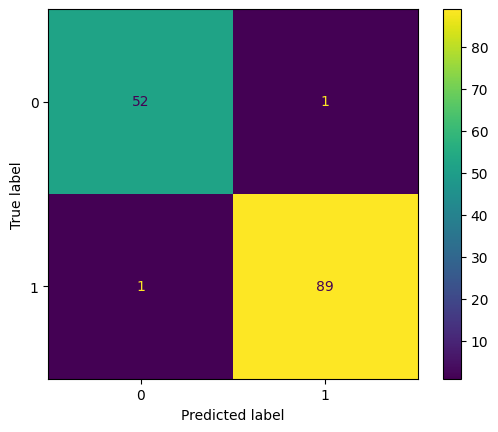

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 예측
y_pred = logistic_model.predict(X_test)

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

# 문제6
문제 4에서 생성한 LogisticRegression 모델을 사용하여 분류 모델의 평가지표(정확도, 정밀도, 재현율, f1-score)를 소수점 넷째자리까지 출력하시오. 유방암 예측 모델의 경우, 위의 4가지 지표 중 가장 중요도가 높은 평가 지표가 무엇인지 설명하시오.


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)

print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1-score: {:.4f}'.
      format(accuracy, precision, recall, f1))

정확도: 0.9860, 정밀도: 0.9889, 재현율: 0.9889, F1-score: 0.9889


# 문제7
문제 4에서 생성한 Random Forest 모델의 GridSearchCV를 사용하여 하이퍼파라미터 튜닝을 수행하고자 한다. 주어진 조건을 사용하여 재현율이 가장 높은 최적 조건을 구하고, 그 때의 테스트 셋의 재현율을 확인하시오.


In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 100, 300],
    'max_depth' : [2, 4, 6],
}
grid_cv = GridSearchCV(forest_model , param_grid=params , cv=3)
grid_cv.fit(X_train , y_train)

print('최적 조건:', grid_cv.best_params_)

model = grid_cv.best_estimator_
y_pred = model.predict(X_test)
print('\n 테스트 셋 재현율:{:.4f}'.format(precision_score(y_test, y_pred)))

최적 조건: {'max_depth': 6, 'n_estimators': 100}

 테스트 셋 재현율:0.9560


#문제8
문제 7에서 확인한 최적의 Random Forest 모델을 사용하여 주어진 데이터 셋을 학습시키고, 예측 결과에 가장 중요한 변수 5개를 확인하시오.


In [18]:
rf_feature_importances = pd.Series(data=model.feature_importances_, index=X.columns)
rf_feature_importances.sort_values(ascending=False)[:5]

,0
worst area,0.152309
worst concave points,0.127365
mean concave points,0.103126
worst radius,0.085575
worst perimeter,0.083333
